In [1]:
from visualise import _get_evoked_group_averages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config as config

In [2]:
dt = 1

In [9]:
# with individual subject efield and TMS efield cutoff: group_ana_with_cutoff
gc_values = []
types = []
P30_amplitude = []
for gc in np.arange(0, 1.3, 0.1):
    
    gc_ = gc.round(2)
    tms_eeg, _ = _get_evoked_group_averages(dt, efield_type_in_sim='individual', experiment='test_new_lf', gc=gc_)


    for type in tms_eeg:
        types.append(type)
        gc_values.append(gc)
        P30_amplitudes = []
        for subject_eeg in tms_eeg[type]:
            P30_amplitudes.append(np.average(subject_eeg, axis=1)[1030]) #avg over all electrodes for 1 subject and extract P30 amplitude
        P30_amplitude.append(np.average(P30_amplitudes)) #avg over all subjects


import pandas as pd
test = pd.DataFrame(
    {"Diagnosis": types, "P30_amplitude": P30_amplitude, "Global Coupling (GC)": gc_values}
)

<AxesSubplot:xlabel='Global Coupling (GC)', ylabel='P30_amplitude'>

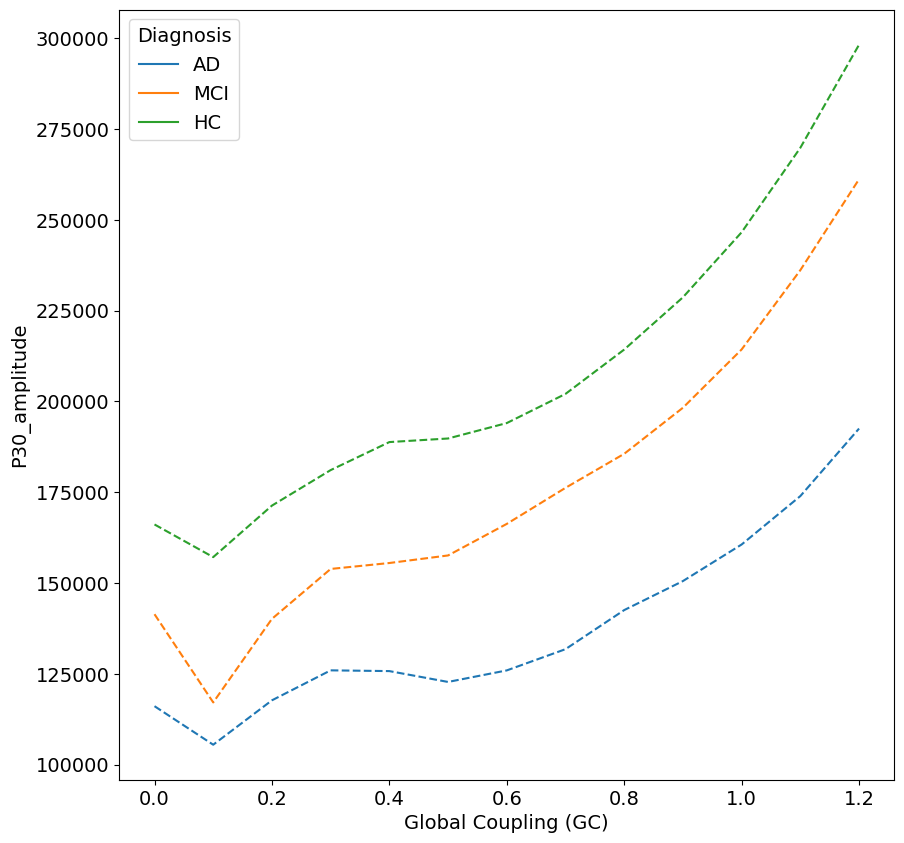

In [12]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Global Coupling (GC)', y='P30_amplitude', hue='Diagnosis',
             data=test, linestyle='--', markersize=5, dashes=False, legend=True)

In [3]:
# with individual subject efield and TMS efield cutoff: group_ana_with_cutoff
gc_values = []
types = []
P30_amplitude = []
for gc in np.arange(0, 1.5, 0.01):
    
    gc_ = "%.2f"%gc if gc>.5 else gc.round(2)
    tms_eeg, _ = _get_evoked_group_averages(dt, efield_type_in_sim='individual', experiment='group_ana_with_cutoff', gc=gc_)


    for type in tms_eeg:
        types.append(type)
        gc_values.append(gc)
        P30_amplitudes = []
        for subject_eeg in tms_eeg[type]:
            P30_amplitudes.append(np.average(subject_eeg, axis=1)[1030]) #avg over all electrodes for 1 subject and extract P30 amplitude
        P30_amplitude.append(np.average(P30_amplitudes)) #avg over all subjects


import pandas as pd
df_group_ana_with_cutoff = pd.DataFrame(
    {"Diagnosis": types, "P30_amplitude": P30_amplitude, "Global Coupling (GC)": gc_values}
)

FileNotFoundError: [Errno 2] No such file or directory: '/media/anujanegi/Anuja Negi/TMS-simulation/data/ADNI/AD/011_S_4547/TVB_simulation_results/group_ana_with_cutoff/gc_0.0/AD_011_S_4547_individual_efield_eeg_data_downsampled_lf.pkl'

In [ ]:
# with group average efield and TMS efield cutoff: group_avg_efield_with_cutoff
gc_values = []
types = []
P30_amplitude = []
for gc in np.arange(0, 1.5, 0.01):
    
    gc_ = gc.round(2)
    tms_eeg, _ = _get_evoked_group_averages(dt, efield_type_in_sim='group_avg', experiment='group_avg_efield_with_cutoff', gc=gc_)


    for type in tms_eeg:
        types.append(type)
        gc_values.append(gc)
        P30_amplitudes = []
        for subject_eeg in tms_eeg[type]:
            P30_amplitudes.append(np.average(subject_eeg, axis=1)[1030]) #avg over all electrodes for 1 subject and extract P30 amplitude
        P30_amplitude.append(np.average(P30_amplitudes)) #avg over all subjects


import pandas as pd
df_group_avg_efield_with_cutoff = pd.DataFrame(
    {"Diagnosis": types, "P30_amplitude": P30_amplitude, "Global Coupling (GC)": gc_values}
)

In [70]:
# with individual subject efield and no cuttoff: ind_efield_without_cutoff
gc_values = []
types = []
P30_amplitude = []
for gc in np.arange(0, 1.5, 0.01):
    
    gc_ = gc.round(2)
    tms_eeg, _ = _get_evoked_group_averages(dt, efield_type_in_sim='individual', experiment='ind_efield_without_cutoff', gc=gc_)


    for type in tms_eeg:
        types.append(type)
        gc_values.append(gc)
        P30_amplitudes = []
        for subject_eeg in tms_eeg[type]:
            P30_amplitudes.append(np.average(subject_eeg, axis=1)[1030]) #avg over all electrodes for 1 subject and extract P30 amplitude
        P30_amplitude.append(np.average(P30_amplitudes)) #avg over all subjects


import pandas as pd
df_ind_efield_without_cutoff = pd.DataFrame(
    {"Diagnosis": types, "P30_amplitude": P30_amplitude, "Global Coupling (GC)": gc_values}
)



In [ ]:

# with group average efield and no cutoff: group_ana_without_cutoff
gc_values = []
types = []
P30_amplitude = []
for gc in np.arange(0, 1.5, 0.01):
    
    gc_ = gc.round(2)
    tms_eeg, _ = _get_evoked_group_averages(dt, efield_type_in_sim='group_avg', experiment='group_ana_without_cutoff', gc=gc_)


    for type in tms_eeg:
        types.append(type)
        gc_values.append(gc)
        P30_amplitudes = []
        for subject_eeg in tms_eeg[type]:
            P30_amplitudes.append(np.average(subject_eeg, axis=1)[1030]) #avg over all electrodes for 1 subject and extract P30 amplitude
        P30_amplitude.append(np.average(P30_amplitudes)) #avg over all subjects


import pandas as pd
df_group_ana_without_cutoff = pd.DataFrame(
    {"Diagnosis": types, "P30_amplitude": P30_amplitude, "Global Coupling (GC)": gc_values}
)

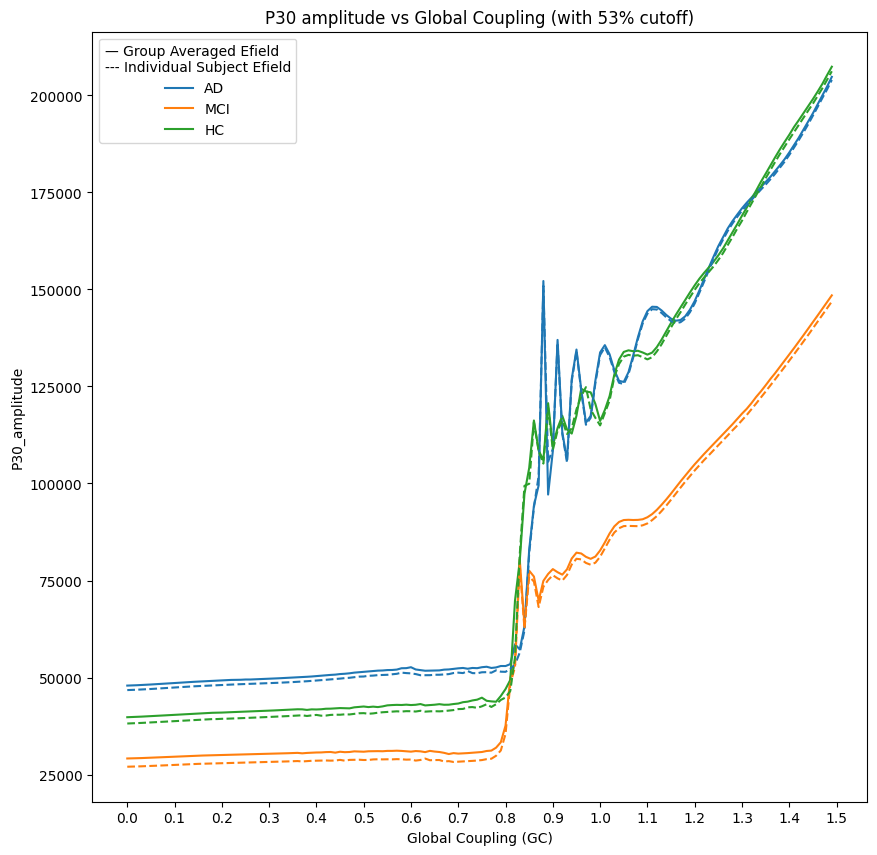

In [38]:
# plot comparison of using individual subject efield vs group average efield for cutoff case
plt.figure(figsize=(10, 10))
sns.lineplot(x='Global Coupling (GC)', y='P30_amplitude', hue='Diagnosis',
             data=df_group_avg_efield_with_cutoff, linestyle='-', markersize=5, dashes=False)

sns.lineplot(x='Global Coupling (GC)', y='P30_amplitude', hue='Diagnosis',
             data=df_group_ana_with_cutoff, linestyle='--', markersize=5, dashes=False, legend=False)
#chnage legend title
plt.legend(title='— Group Averaged Efield\n--- Individual Subject Efield')


# set x axis ticks
plt.xticks(np.arange(0, 1.51, 0.1))
plt.title("P30 amplitude vs Global Coupling (with 53% cutoff)")
plt.show()

In [72]:

# with group average efield and no cutoff: group_ana_without_cutoff
gc_values = []
types = []
P30_amplitude = []
for gc in np.arange(0, 1.5, 0.01):
    
    gc_ = gc.round(2)
    try:
        tms_eeg, _ = _get_evoked_group_averages(dt, efield_type_in_sim='individual', experiment='healthy_SC_without_cutoff', gc=gc_)


        for type in tms_eeg:
            types.append(type)
            gc_values.append(gc)
            P30_amplitudes = []
            for subject_eeg in tms_eeg[type]:
                P30_amplitudes.append(np.average(subject_eeg, axis=1)[1030]) #avg over all electrodes for 1 subject and extract P30 amplitude
            P30_amplitude.append(np.average(P30_amplitudes)) #avg over all subjects

    except:
        pass
    
import pandas as pd
df_healthy_SC_without_cutoff = pd.DataFrame(
    {"Diagnosis": types, "P30_amplitude": P30_amplitude, "Global Coupling (GC)": gc_values}
)

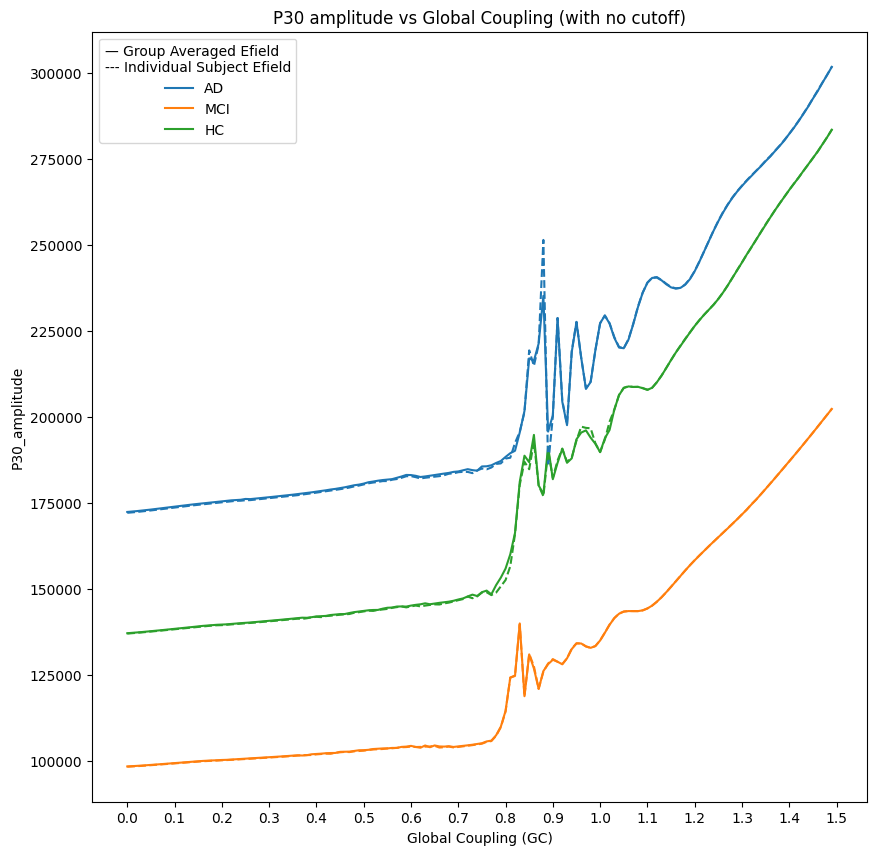

In [37]:
# plot comparison of using individual subject efield vs group average efield for no cutoff case
plt.figure(figsize=(10, 10))
sns.lineplot(x='Global Coupling (GC)', y='P30_amplitude', hue='Diagnosis',
             data=df_group_ana_without_cutoff, linestyle='-', markersize=5, dashes=False)

sns.lineplot(x='Global Coupling (GC)', y='P30_amplitude', hue='Diagnosis',
             data=df_ind_efield_without_cutoff, linestyle='--', markersize=5, dashes=False, legend=False)
#chnage legend title
plt.legend(title='— Group Averaged Efield\n--- Individual Subject Efield')


# set x axis ticks
plt.xticks(np.arange(0, 1.51, 0.1))
plt.title("P30 amplitude vs Global Coupling (with no cutoff)")
plt.show()

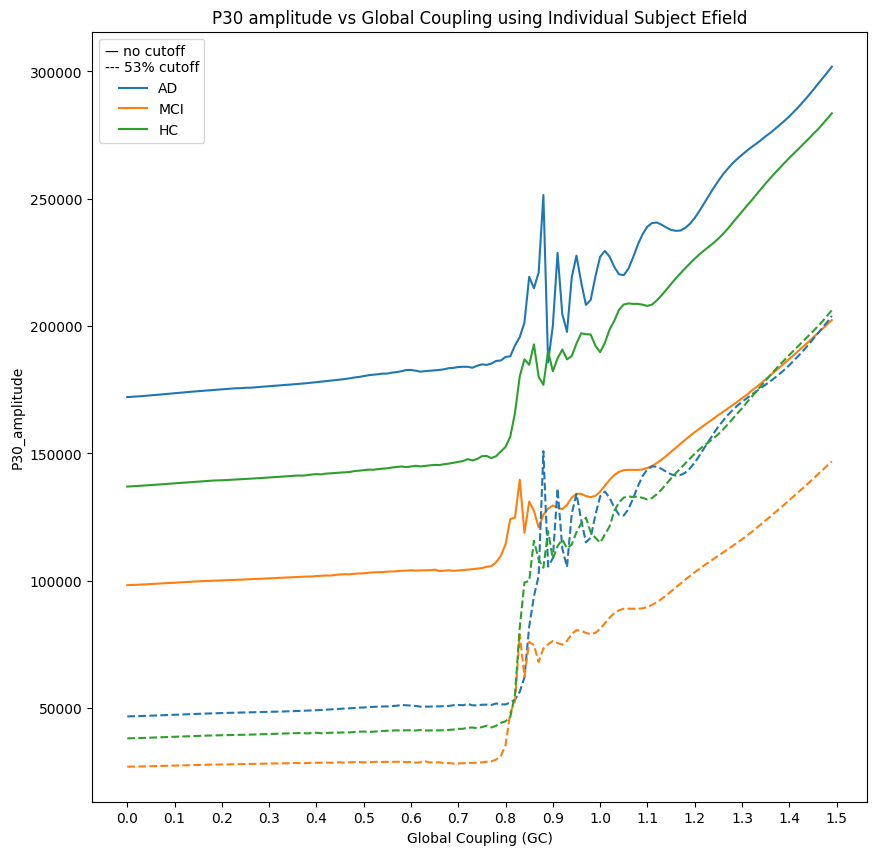

In [39]:
# plot individual subject efield with cutoff vs without cutoff
plt.figure(figsize=(10, 10))
sns.lineplot(x='Global Coupling (GC)', y='P30_amplitude', hue='Diagnosis',
             data=df_ind_efield_without_cutoff, linestyle='-', markersize=5, dashes=False)

sns.lineplot(x='Global Coupling (GC)', y='P30_amplitude', hue='Diagnosis',
             data=df_group_ana_with_cutoff, linestyle='--', markersize=5, dashes=False, legend=False)
#chnage legend title
plt.legend(title='— no cutoff \n--- 53% cutoff')


# set x axis ticks
plt.xticks(np.arange(0, 1.51, 0.1))
plt.title("P30 amplitude vs Global Coupling using Individual Subject Efield")
plt.show()

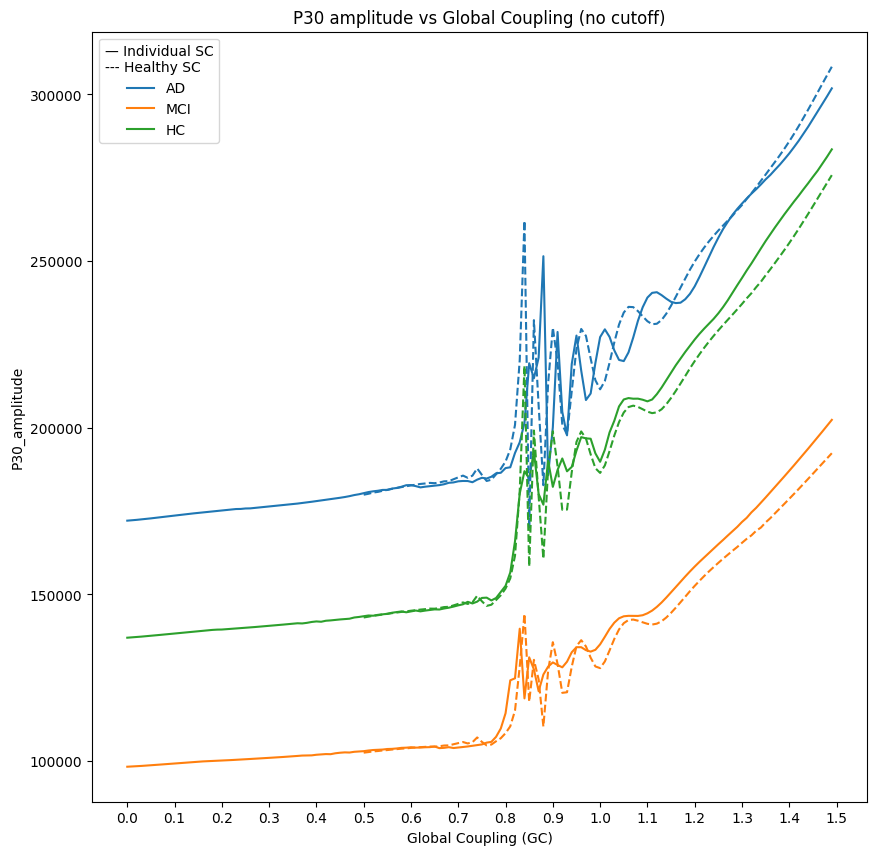

In [73]:
# plot comparison of using individual subject SC vs healthy SC for cutoff case
plt.figure(figsize=(10, 10))
sns.lineplot(x='Global Coupling (GC)', y='P30_amplitude', hue='Diagnosis',
             data=df_ind_efield_without_cutoff, linestyle='-', markersize=5, dashes=False)

sns.lineplot(x='Global Coupling (GC)', y='P30_amplitude', hue='Diagnosis',
             data=df_healthy_SC_without_cutoff, linestyle='--', markersize=5, dashes=False, legend=False)
#chnage legend title
plt.legend(title='— Individual SC\n--- Healthy SC')


# set x axis ticks
plt.xticks(np.arange(0, 1.51, 0.1))
plt.title("P30 amplitude vs Global Coupling (no cutoff)")
plt.show()

In [4]:
gc_values = []
types = []
P30_amplitude = []
for gc in np.arange(0, 1.5, 0.01):
    
    gc_ = "%.2f"%gc if gc>.5 else gc.round(2)
    tms_eeg, _ = _get_evoked_group_averages(dt, efield_type_in_sim, gc_)


    for type in tms_eeg:
        types.append(type)
        gc_values.append(gc)
        P30_amplitudes = []
        for subject_eeg in tms_eeg[type]:
            P30_amplitudes.append(np.average(subject_eeg, axis=1)[1030]) #avg over all electrodes for 1 subject and extract P30 amplitude
        P30_amplitude.append(np.average(P30_amplitudes)) #avg over all subjects


import pandas as pd
df = pd.DataFrame(
    {"Diagnosis": types, "P30_amplitude": P30_amplitude, "Global Coupling (GC)": gc_values}
)

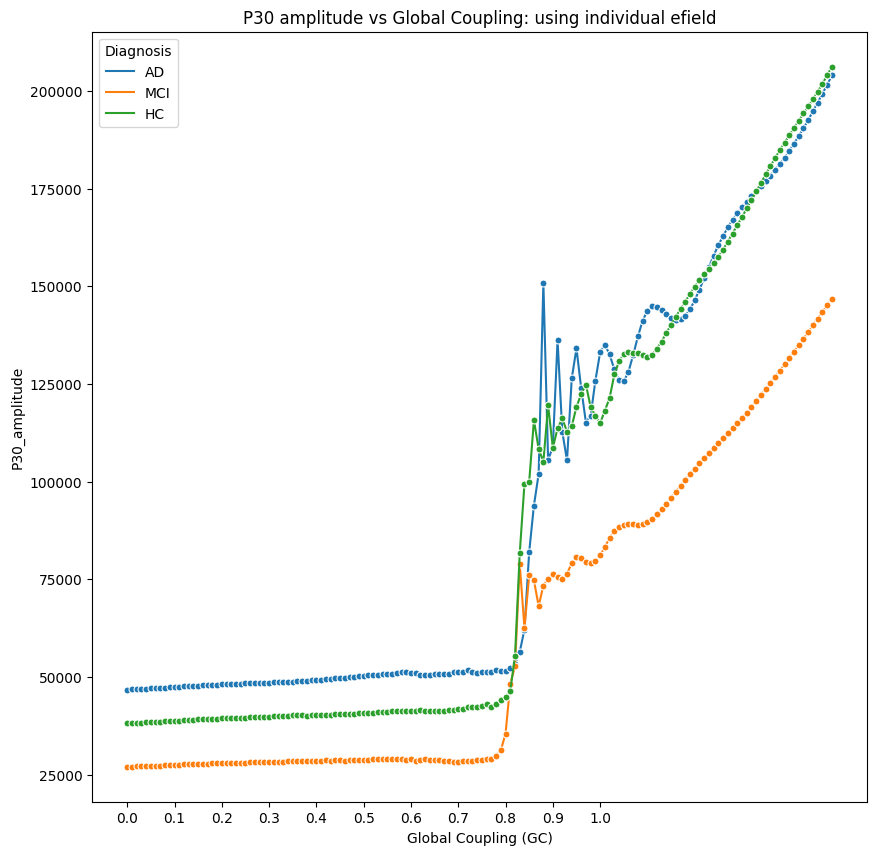

In [5]:
plt.figure(figsize=(10, 10))
sns.lineplot(x='Global Coupling (GC)', y='P30_amplitude', hue='Diagnosis',
             data=df, linestyle='-', marker='o', markersize=5, dashes=False)
# set x axis ticks
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("P30 amplitude vs Global Coupling: using individual efield")
plt.show()

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
Saved to individual


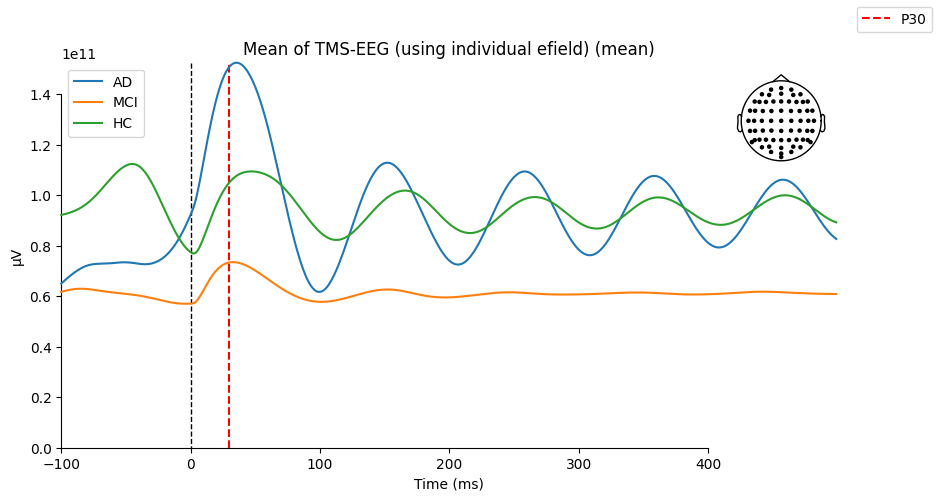

In [64]:
from visualise import _get_evoked_group_averages, plot_TMS_EEG_comparison
plot_TMS_EEG_comparison(dt, efield_type_in_sim, gc=0.88)

In [ ]:
from run_simulations import run_TMS_EEG_simulations
# /TMS-simulation/data/ADNI/AD/168_S_6142/TVB_simulation_results/group_ana_with_cutoff/gc_0.76/AD_168_S_6142_individual_efield_eeg_data_educase_lf.pkl
for gc in [.80, .90]
    run_TMS_EEG_simulations(subject='168_S_6142', type='AD', overwrite=False, global_coupling=gc, efield_type="individual", plotting=True, do_resting_state_simulation=False)

SyntaxError: invalid syntax (2785456652.py, line 3)

In [ ]:
import os
import shutil

# renaming all folders and trucating the gc value to 2 decimal places
for type in config.subjects.keys():
    for subject in config.subjects[type]:
        path = f"/media/anujanegi/Anuja Negi/TMS-simulation/data/ADNI/{type}/{subject}/TVB_simulation_results/group_ana_with_cutoff"
        folders = os.listdir(path)
        for folder in folders:
            if not os.path.exists(os.path.join(path, folder[:7])):
                os.mkdir(os.path.join(path, folder[:7]))
            shutil.move(os.path.join(path, folder), os.path.join(path, folder[:7]))
            os.rename(os.path.join(path, folder), os.path.join(path, folder[:7]))

In [ ]:
import os
import shutil

# fixing error from before and moving files
for type in config.subjects.keys():
    for subject in config.subjects[type]:
        path = f"/media/anujanegi/Anuja Negi/TMS-simulation/data/ADNI/{type}/{subject}/TVB_simulation_results/group_ana_with_cutoff"
        folders = os.listdir(path)
        for folder in folders: #in gc folder
            try:
                    
                dest = os.path.join(path, folder)
                for sub in os.listdir(dest): #subfolder
                    for f in os.listdir(os.path.join(dest, sub)): #file in subfolder
                        shutil.move(os.path.join(dest, sub, f), os.path.join(dest, f))
            except:
                pass

np.arange(0, 1, 0.1)

In [ ]:
import os
import shutil

folder = r"<MAIN FOLDER>"
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]

for sub in subfolders:
    for f in os.listdir(sub):
        src = os.path.join(sub, f)
        dst = os.path.join(folder, f)
        shutil.move(src, dst)

In [49]:
def plot_P30_MMSE_correlation(efield_type_in_sim, **kwargs):
    tms_eeg, _ = _get_evoked_group_averages(dt, efield_type_in_sim, **kwargs)

    subjects = sum([config.subjects[type] for type in config.subjects], [])
    mmse = [config.MMSE[i] for i in subjects]
    types = []
    P30_amplitude = []
    for type in tms_eeg:
        for subject_eeg in tms_eeg[type]:
            types.append(type)
            P30_amplitude.append(np.average(subject_eeg, axis=1)[1030])
    import pandas as pd
    df = pd.DataFrame(
        {"subject_ID": subjects, "Diagnosis": types, "P30_amplitude": P30_amplitude, "MMSE Score": mmse}
    )
    sns.scatterplot(data=df, x='MMSE Score', y='P30_amplitude', hue='Diagnosis', style='Diagnosis', markers=True, s=100)
    return df

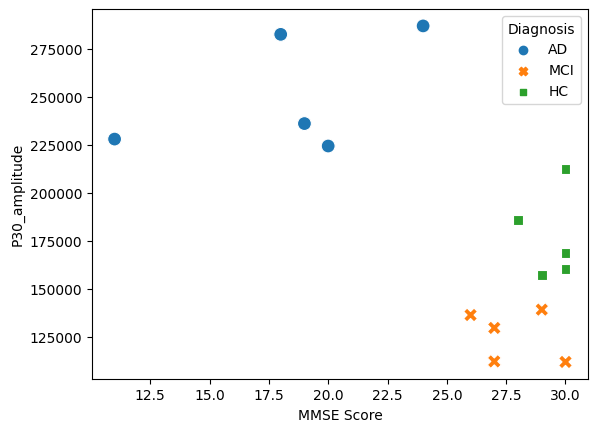

In [50]:
a = plot_P30_MMSE_correlation(efield_type_in_sim='individual', gc = 0.88, experiment = "ind_efield_without_cutoff")
# seaborn lineplot
# sns.lineplot(x='MMSE Score', hue='Diagnosis', data=a, y='P30_amplitude', marker='o', markersize=5, dashes=False)


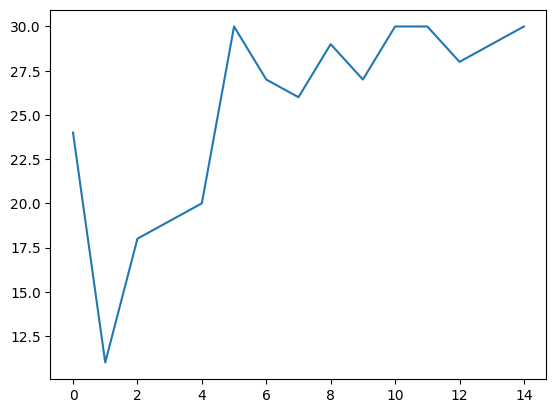

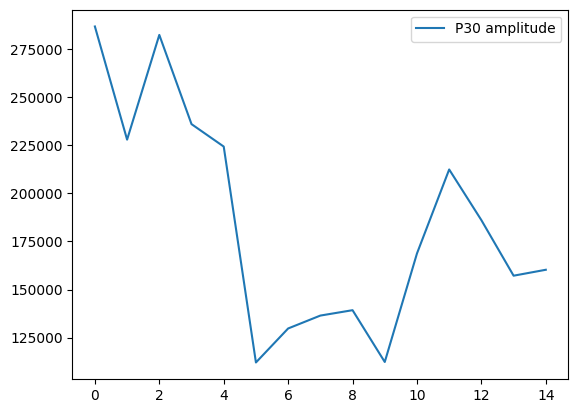

In [35]:
plt.plot(a['MMSE Score'], label='MMSE Score')
plt.figure()
plt.plot(a['P30_amplitude'], label='P30 amplitude')
plt.legend()

<AxesSubplot:ylabel='MMSE Score'>

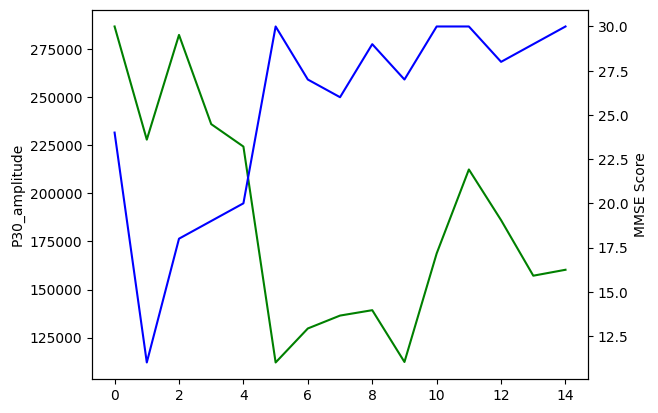

In [43]:
g = sns.lineplot(data=a.P30_amplitude, color="g")
sns.lineplot(data=a['MMSE Score'], color="b", ax=g.axes.twinx())
# g.legend(handles=[Line2D([], [], marker='_', color="g", label='column1'), Line2D([], [], marker='_', color="b", label='column2')])


<AxesSubplot:xlabel='MMSE Score', ylabel='P30_amplitude'>

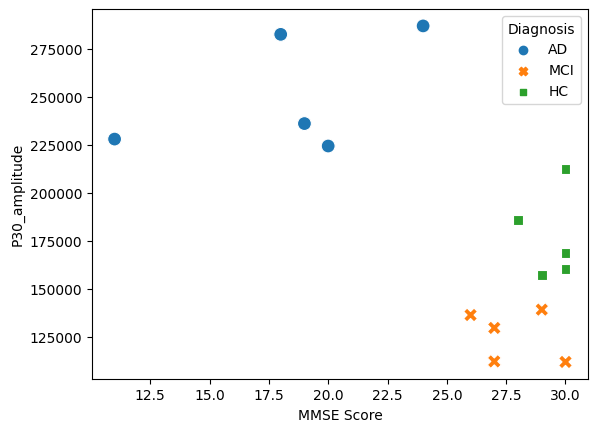

In [44]:
sns.scatterplot(data=a, x='MMSE Score', y='P30_amplitude', hue='Diagnosis', style='Diagnosis', markers=True, s=100)

In [66]:

for type in config.subjects.keys():
    sub = a[a.Diagnosis==type]
    # print(sub)
    corr = sub['MMSE Score'].corr(sub['P30_amplitude'])
    print(f"{type}: {corr.round(2)}")


AD: 0.53
MCI: -0.3
HC: 0.02
